In [30]:
import sys
from nn_visualize import draw_graph
from mlp_model  import MLP, Neuron
from mlp_value import Value
import random
sys.path.append("..")

In [2]:
def mean_squared_error_loss(y_actual, y_prediction):
    error = 0
    for ya, yp in zip(y_actual, y_prediction):
        diff = (yp - ya)
        error += diff ** 2
    return  error / len(y_actual)

def calculate_loss(mlp, X, y, iter=10):
    for i in range(iter):
        # forward pass
        y_prediction =  [mlp(x) for x in X]
        loss = mean_squared_error_loss(y, y_prediction)
        print(f"[{i}] loss: {loss.data}")

        for p in mlp.parameters():
            p.gradient = 0.0
        # backward pass
        loss.backward()

        # update
        for p in mlp.parameters():
            p.data =  p.data -  0.01 * p.gradient
        
if __name__ == "__main__":
    from mlp_model  import MLP

    mlp = MLP(3, [4, 4, 1]) # model

    X = [
        [2.0, 3.0, -1.0],
        [3.0, -1.0, 0.5],
        [0.5, 1.0, 1.0],
        [1.0, 1.0, -1.0],
    ] # 4 forward passes
    y = [1.0, -1.0, -1.0, 1.0] # desired targets
    
    calculate_loss(mlp, X, y, iter=20)

[0] loss: 1.3953094779289956
[1] loss: 1.3812517613001998
[2] loss: 1.3672229172104808
[3] loss: 1.3532254465188227
[4] loss: 1.33925854607646
[5] loss: 1.325317884334801
[6] loss: 1.3113953798966071
[7] loss: 1.297478971385635
[8] loss: 1.2835523647561322
[9] loss: 1.2695947419553026
[10] loss: 1.2555804126023926
[11] loss: 1.2414783879557885
[12] loss: 1.227251853809006
[13] loss: 1.212857516031188
[14] loss: 1.1982447892812527
[15] loss: 1.183354796185231
[16] loss: 1.1681191414977707
[17] loss: 1.1524584245497416
[18] loss: 1.1362804556467474
[19] loss: 1.119478151673721


In [7]:
from nn_visualize import draw_graph

In [12]:
from mlp_model  import MLP

mlp = MLP(3, [4, 4, 1]) # model

X = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
] # 4 forward passes
y = [1.0, -1.0, -1.0, 1.0] # desired targets



In [13]:
y_prediction =  [mlp(x) for x in X]
loss = mean_squared_error_loss(y, y_prediction)
loss

Value(data=0.9435081751100014, gradient=0.0)

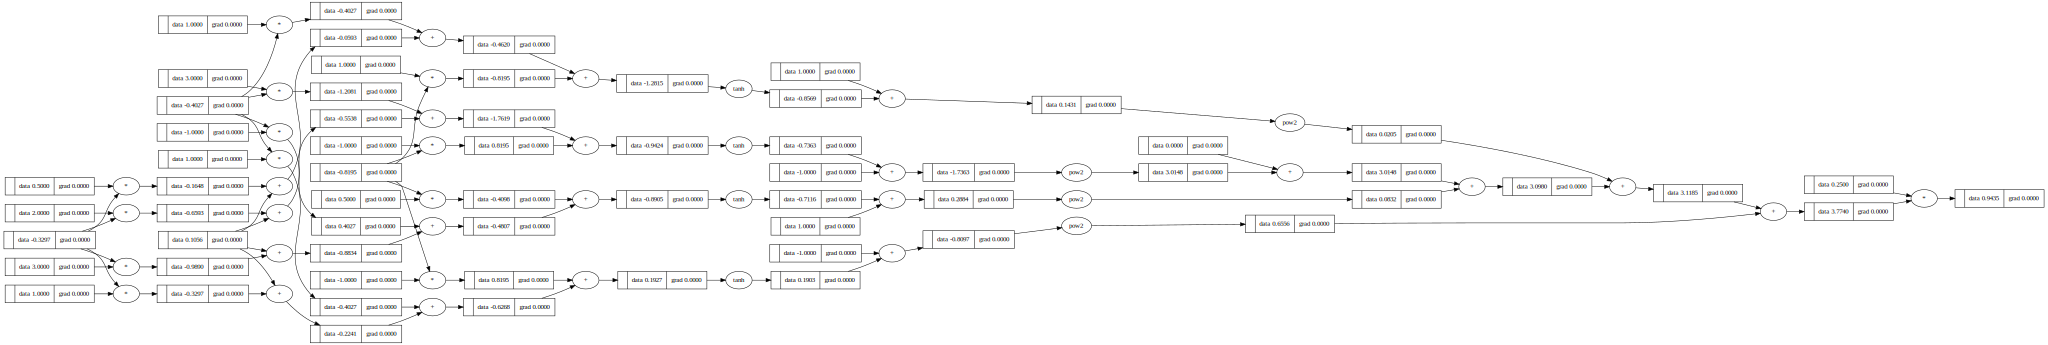

In [14]:
draw_graph(loss)

In [15]:
loss.backward()

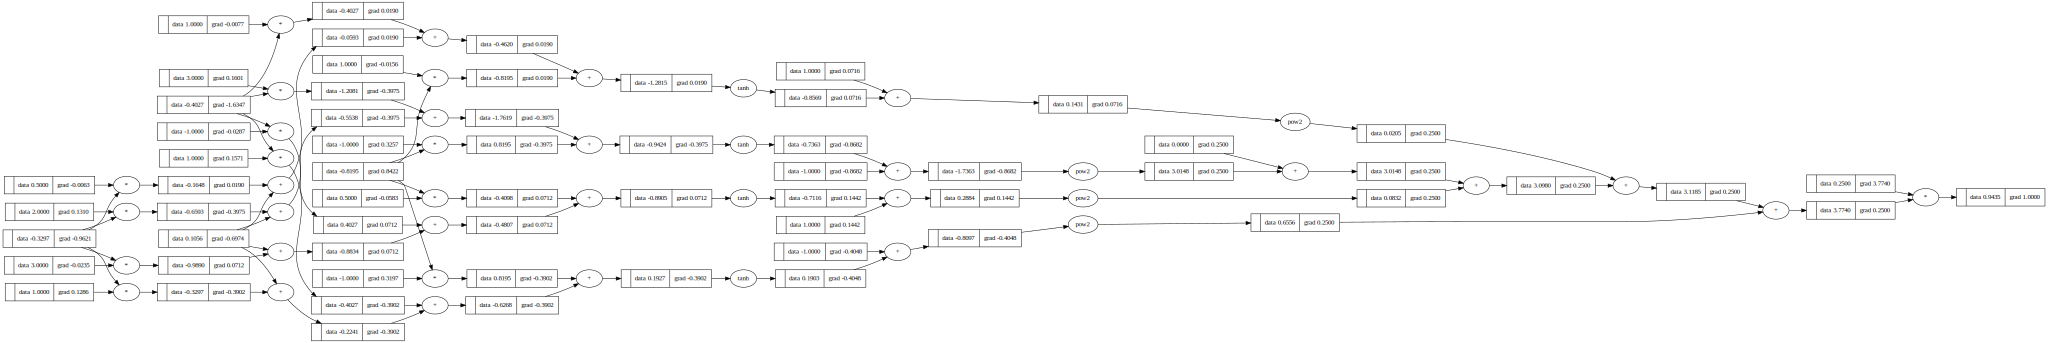

In [16]:
draw_graph(loss)

In [10]:
x = Value(2.0)
y = Value(-3.0)

w = -1
b = 0
f = w * x + b

loss = ((f - y)**2)

print(f"loss: {loss}")

f.backward()

loss: Value(data=1.0, gradient=0.0)


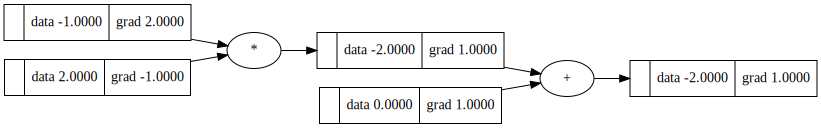

In [12]:
draw_graph(f)

In [15]:

x = [Value(1.0), Value(10.0), Value(-9.0), Value(4.0)]
w = [Value(random.uniform(-1, 1)) for _ in range(4)]
b = 0
f = sum((wi * xi for xi, wi in zip(x, w)), b)

f.backward()

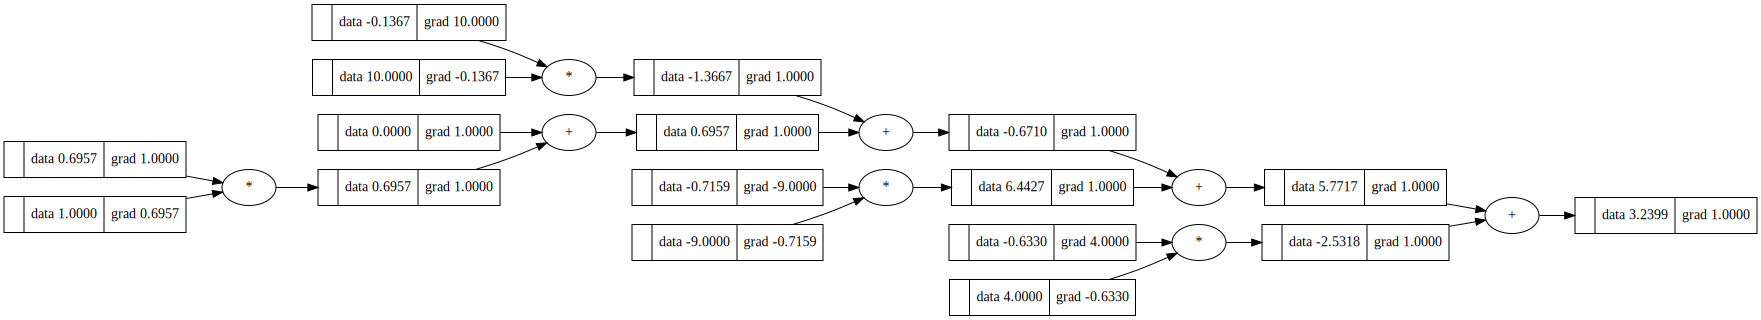

In [16]:
draw_graph(f)

In [21]:
import torch

w = [random.uniform(-1, 1) for _ in range(4)]
xtorch = [
torch.Tensor([1.0]).double(),
torch.Tensor([10.0]).double(),
torch.Tensor([-9.0]).double(),
torch.Tensor([-4.0]).double(),
] # 64-bit
for xt in xtorch:
    xt.requires_grad = True

ftorch = sum((wi * xi for xi, wi in zip(xtorch, w)), b)
ftorch.backward()

print(ftorch)
assert ftorch.grad  

tensor([5.1115], dtype=torch.float64, grad_fn=<AddBackward0>)


/home/vagrant/.local/lib/python3.6/site-packages/torch/_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:417.)
  return self._grad


AssertionError: 

In [22]:
torch.Tensor([[1.0], [10.0], [-9.0], [-2]]).double()

tensor([[ 1.],
        [10.],
        [-9.],
        [-2.]], dtype=torch.float64)

In [23]:
x = [1.0, 10.0, -9.0, -2]
w = [(random.uniform(-1, 1)) for _ in range(4)]
b = 0
# hack found :P
f = sum((Value(wi) * xi for xi, wi in zip(x, w)), b)

f.backward()

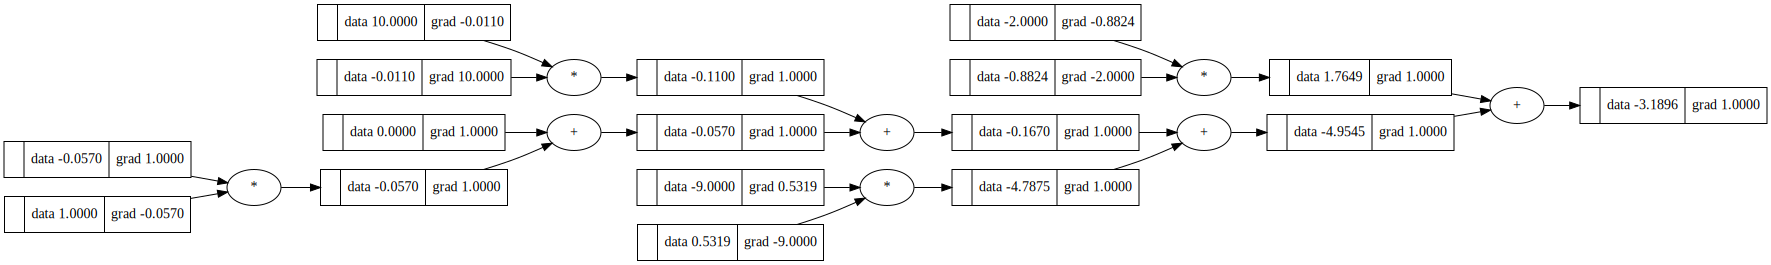

In [24]:
draw_graph(f)

In [38]:
 x = [
        [1.0, 2.0, 3.0],
        [9.0, -1.0, 5.0],
    ]
 
y =[6.0, 4.0]

In [39]:
neuron = Neuron(3)

In [83]:
predic = [neuron(pt) for pt in x]

In [84]:
predic

[Value(data=0.9999997871753469, gradient=0.0), Value(data=1.0, gradient=0.0)]

In [85]:
for p in neuron.parameters():
            # print(p)
            p.gradient = 0.0

In [86]:
mse = sum((pi - yi)**2 for pi, yi in zip(predic, y)) / len(y)

In [87]:
mse

Value(data=17.00000106412329, gradient=0.0)

In [88]:
mse.backward()

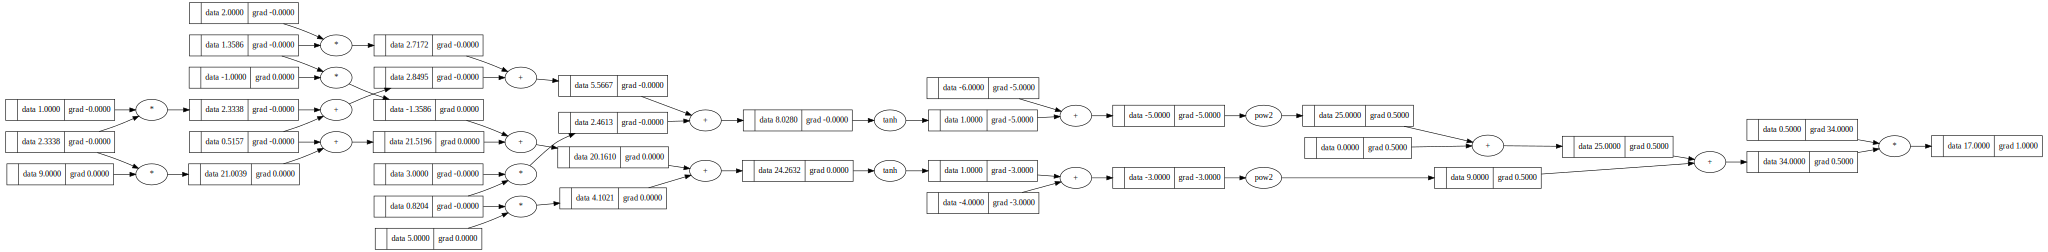

In [89]:
draw_graph(mse)

In [91]:
 for p in neuron.parameters():
            print(p)
            p.data = p.data - 0.1 * p.gradient

Value(data=2.3337675499556463, gradient=-2.128246395333164e-06)
Value(data=1.3585939156810696, gradient=-4.256492790666328e-06)
Value(data=0.8204277284234682, gradient=-6.384739185999492e-06)
Value(data=0.5157367803157554, gradient=-2.128246395333164e-06)


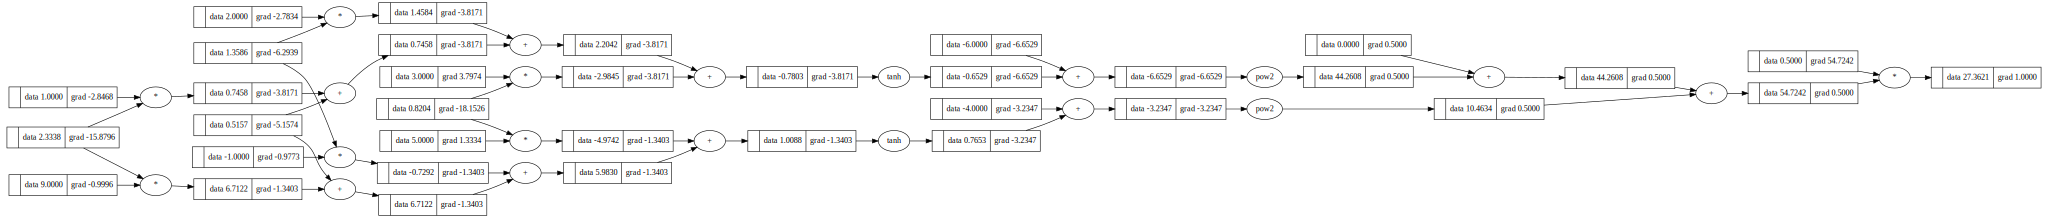

In [46]:
draw_graph(mse)

In [47]:
5.217242529479667e+16 > 431.

True

In [136]:

def regression_including_mseloss():

    # 3 features
    # 2 data pts. 
    x = [
        [1.0, 2.0, 3.0],
        [9.0, -1.0, 5.0],
    ]
    # target out
    y = [-6.0, 4.0]


    # 3 features NN
    neuron = Neuron(3)

    epochs = 1000
    for epoch in range(epochs):
        predic = [neuron(pt) for pt in x]

        # print(predic)
        # MES loss
        mse = sum((pi - yi)**2 for pi, yi in zip(predic, y))

        for p in neuron.parameters():
            # print(p)
            p.gradient = 0.0


        mse.backward()

        print(f"mse: {mse}")

        # updating weights
        for p in neuron.parameters():
            # print(p.data)
            p.data = p.data - 0.3 * p.gradient

In [137]:
regression_including_mseloss()

mse: Value(data=54.72088536098297, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data

mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradie

mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradient=1.0)
mse: Value(data=50.0, gradie

In [138]:
x_torch = torch.Tensor([[1.0, 2.0, 3.0], [9.0, -1.0, 5.0]]).double()
x_torch.requires_grad = True

In [155]:


w_for_torch = [torch.tensor(w.data, requires_grad=True) for w in neuron.w]

In [172]:
xtr = []
for xt in x_torch:
    tr = sum((wi*xi for wi,xi in zip(w_for_torch, xt)), b)
    xtr.append(tr)

In [173]:
xtr

[tensor(7.5122, dtype=torch.float64, grad_fn=<AddBackward0>),
 tensor(23.7475, dtype=torch.float64, grad_fn=<AddBackward0>)]

In [174]:
mse = sum((pi - yi)**2 for pi, yi in zip(xtr, y)) / len(y)

In [175]:
mse.backward()

In [182]:
mse

tensor(196.1245, dtype=torch.float64, grad_fn=<DivBackward0>)

In [176]:
w_for_torch

tensor([2.3338, 1.3586, 0.8204], dtype=torch.float64,
       grad_fn=<ToCopyBackward0>)

In [171]:
w_for_torch = torch.tensor([w.data for w in neuron.w], requires_grad=True).double()

In [170]:
for p in w_for_torch:
    print(p.grad)

AttributeError: 'NoneType' object has no attribute 'data'

In [180]:
w_for_torch[0].grad